In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [2]:
bacaBrand = spark.read.option("inferSchema","true").csv("MsBrand.csv",header=True)
bacaCountry = spark.read.option("inferSchema","true").csv("MsCountry.csv",header=True)
bacaCustomer = spark.read.option("inferSchema","true").csv("MsCustomer.csv",header=True)
bacaRamen = spark.read.option("inferSchema","true").csv("MsRamen.csv",header=True)
bacaRamenStyle = spark.read.option("inferSchema","true").csv("MsRamenStyle.csv",header=True)
bacaTransactionHeader = spark.read.option("inferSchema","true").csv("TransactionHeader.csv",header=True)
bacaTransactionDetail = spark.read.option("inferSchema","true").csv("TransactionDetail.csv",header=True)

In [11]:
bacaBrand.registerTempTable("MsBrand")
bacaCountry.registerTempTable("MsCountry")
bacaCustomer.registerTempTable("MsCustomer")
bacaRamen.registerTempTable("MsRamen")
bacaRamenStyle.registerTempTable("MsRamenStyle")
bacaTransactionHeader.registerTempTable("TransactionHeader")
bacaTransactionDetail.registerTempTable("TransactionDetail")

+-----------+-----------+
|CountryName|RamenNumber|
+-----------+-----------+
|      Japan|        352|
|        USA|        323|
|South Korea|        309|
|     Taiwan|        224|
|   Thailand|        191|
+-----------+-----------+



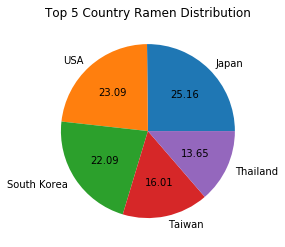

In [14]:
import matplotlib.pyplot as plt

isiLingkaran = spark.sql("""SELECT a.CountryName,COUNT(b.RamenID) AS RamenNumber
                    FROM MsCountry a 
                    JOIN MsRamen b on a.CountryID = b.CountryID
                    GROUP BY a.CountryName
                    ORDER BY RamenNumber DESC
                    LIMIT 5""")
isiLingkaran.show()
isiLingkaran = isiLingkaran.toPandas()
plt.title("Top 5 Country Ramen Distribution")
plt.pie(isiLingkaran['RamenNumber'],labels=isiLingkaran['CountryName'],autopct="%.2f")
plt.show()

+-----+---------+
|Month|   Profit|
+-----+---------+
|    1|316534000|
|    2|292087000|
|    3|328064000|
|    4|302013000|
|    5|305102000|
|    6|310177000|
|    7|312101000|
|    8|328337000|
|    9|307199000|
|   10|317046000|
|   11|317946000|
|   12|295857000|
+-----+---------+



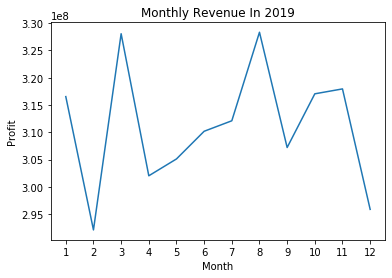

In [15]:
isiGaris = spark.sql("""SELECT MONTH(a.TransactionDate) AS Month,SUM(b.Quantity*c.RamenPrice) AS Profit
                    FROM TransactionHeader a
                    JOIN TransactionDetail b ON a.TransactionID=b.TransactionID
                    JOIN MsRamen c ON c.RamenID=b.RamenID
                    WHERE YEAR(a.TransactionDate)=2019
                    GROUP BY Month
                    ORDER BY Month""")
isiGaris.show()
isiGaris = isiGaris.toPandas()
plt.plot(isiGaris['Profit'])
plt.xticks(range(len(isiGaris['Month'])),isiGaris['Month'])
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Monthly Revenue In 2019")
plt.show()

+--------------+---------+
|RamenStyleName|Frequency|
+--------------+---------+
|          Pack|     1533|
|          Bowl|      481|
|           Cup|      450|
|          Tray|      108|
|           Box|        6|
+--------------+---------+



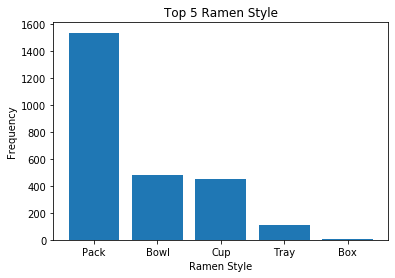

In [16]:
isiBar = spark.sql("""SELECT a.RamenStyleName,COUNT(b.RamenID) AS Frequency
                    FROM MsRamenStyle a
                    JOIN MsRamen b ON a.RamenStyleID=b.RamenStyleID
                    GROUP BY a.RamenStyleName
                    ORDER BY Frequency DESC
                    LIMIT 5""")
isiBar.show()
isiBar = isiBar.toPandas()
plt.bar(isiBar['RamenStyleName'],isiBar['Frequency'])
plt.xlabel('Ramen Style')
plt.ylabel('Frequency')
plt.title("Top 5 Ramen Style")
plt.show()

+---------+------------+
|Frequency| RamenTitles|
+---------+------------+
|     2427|Ramen Newbie|
|       29|Ramen Master|
|      435| Ramen Lover|
+---------+------------+



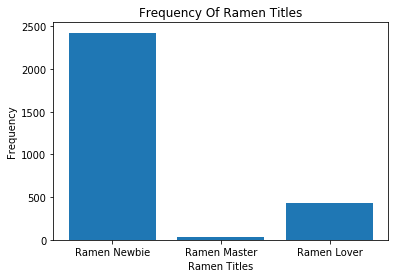

In [17]:
isiBarPlot = spark.sql("""SELECT COUNT(x.CustomerID) AS Frequency,x.RamenTitles FROM(
                    SELECT a.CustomerID,
                    CASE
                        WHEN SUM(b.Quantity)>125 THEN 'Ramen Master'
                        WHEN SUM(b.Quantity)>75 THEN 'Ramen Lover'
                        WHEN SUM(b.Quantity)>0 THEN 'Ramen Newbie'
                    END AS RamenTitles
                    FROM TransactionHeader a 
                    JOIN TransactionDetail b ON a.TransactionID=b.TransactionID
                    GROUP BY a.CustomerID
                    ) AS x
                    GROUP BY x.RamenTitles""")
isiBarPlot.show()
isiBarPlot = isiBarPlot.toPandas()
plt.bar(isiBarPlot['RamenTitles'],isiBarPlot['Frequency'])
plt.xlabel('Ramen Titles')
plt.ylabel('Frequency')
plt.title("Frequency Of Ramen Titles")
plt.show()